# **Read and convert image data**

This code reads the before and after images as well as their labels and then processes it.

## Setup environment

In [7]:
import numpy as np
import skimage as ski
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt
import os

In [6]:
workDir = os.getcwd()
db = 'database/'

print(db)

database/


### Reader function

In [8]:
def readImage(path):
    img = io.imread(path,False)
    return img

database/hurricane-florence_00000001_pre_disaster.png
(1024, 1024, 3)


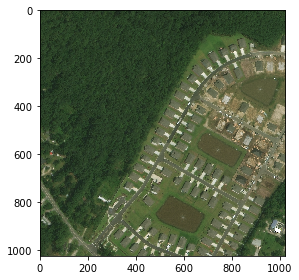

In [21]:
imgIDlist = pd.read_csv(db+'idList.csv')
# print(imgIDlist)
nWidth = 8 # width of ID in file name

endTxt = '_pre_disaster.png'

i = 1
imgName = db + imgIDlist.Disaster[i] + '_' + str(imgIDlist.ID[i]).rjust(nWidth,'0') + endTxt
print(imgName)

img = readImage(imgName)
print(img.shape)
io.imshow(img)